In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_html('https://github.com/adiptamartulandi/Simple-Linear-Regression/blob/master/data.csv')

In [4]:
data

[     Unnamed: 0  Unnamed: 1  horsepower    price
 0           NaN           0       111.0  13495.0
 1           NaN           1       111.0  16500.0
 2           NaN           2       154.0  16500.0
 3           NaN           3       102.0  13950.0
 4           NaN           4       115.0  17450.0
 ..          ...         ...         ...      ...
 195         NaN         200       114.0  16845.0
 196         NaN         201       160.0  19045.0
 197         NaN         202       134.0  21485.0
 198         NaN         203       106.0  22470.0
 199         NaN         204       114.0  22625.0
 
 [200 rows x 4 columns]]

In [5]:
data

[     Unnamed: 0  Unnamed: 1  horsepower    price
 0           NaN           0       111.0  13495.0
 1           NaN           1       111.0  16500.0
 2           NaN           2       154.0  16500.0
 3           NaN           3       102.0  13950.0
 4           NaN           4       115.0  17450.0
 ..          ...         ...         ...      ...
 195         NaN         200       114.0  16845.0
 196         NaN         201       160.0  19045.0
 197         NaN         202       134.0  21485.0
 198         NaN         203       106.0  22470.0
 199         NaN         204       114.0  22625.0
 
 [200 rows x 4 columns]]

In [5]:
data = data[0].to_csv('datamobil.csv',index=False)

In [6]:
datacsv = pd.read_csv('datamobil.csv',usecols=['horsepower','price'])

In [7]:
datacsv

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
195,114.0,16845.0
196,160.0,19045.0
197,134.0,21485.0
198,106.0,22470.0


In [8]:
datacsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
datacsv.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [10]:
datacsv.isnull().sum()

horsepower    0
price         0
dtype: int64

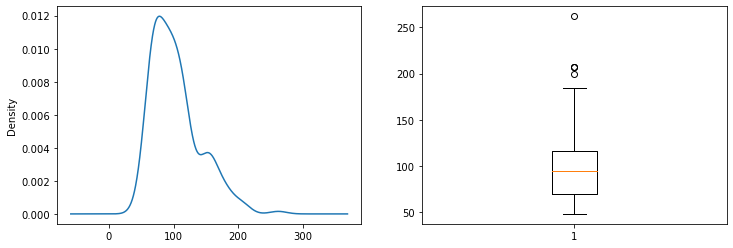

In [12]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
datacsv['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(datacsv['horsepower'])
plt.show()

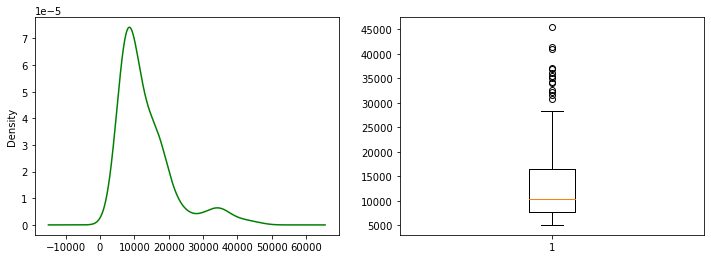

In [13]:
#Univariate analysis price.
#Melihat distribusi dari price.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
datacsv['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(datacsv['price'])
plt.show()

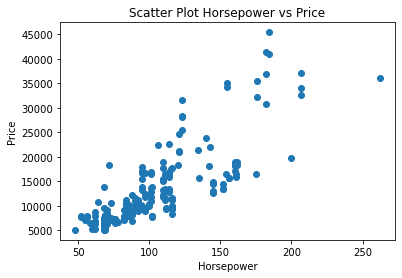

In [14]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.

plt.scatter(datacsv['horsepower'], datacsv['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [11]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.

datacsv.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [13]:
#Pertama, buat variabel x dan y
x = datacsv['horsepower'].values.reshape(-1,1)
y = datacsv['price'].values.reshape(-1,1)

In [14]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [57]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [58]:
#Kelima, cari tau nilai slope/koefisien (a) dan konstanta (b)
#y = ax + b

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[166.17301025]]
[-4079.11402181]


In [59]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.7426221837728404

Text(0.5, 1.0, 'Plot Horsepower vs Price')

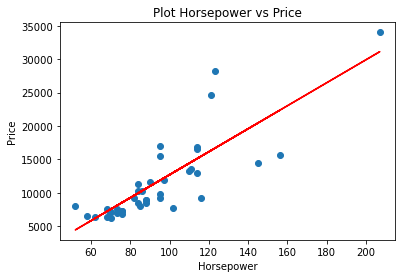

In [47]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi

y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [38]:
#Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12641.13086761]])

In [41]:
#Prediksi harga mobil dengan horsepower 100
lin_reg.predict([[200]])

array([[29506.27885348]])

In [27]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x_test, y_test, color='red')
    plt.plot(x_test, pol_reg.predict(poly_reg.fit_transform(x_test)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

ValueError: Found input variables with inconsistent numbers of samples: [40, 200]